# **Setup**
Data Exploration Project

Group: "Insight Explorers" (Course WWI19DSB)

Topic: House Pricing / House Price Prediction

Goal: We want to predict house prices in Seattle, USA by using Regression Models.

In [1]:
#Import the required modules
#Basic modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

#Chapter: Prepare the data
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

#Machine Learning and Evaluation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from pprint import pprint
from sklearn.model_selection import GridSearchCV

In [2]:
#Download csv-file with house-price data from public google drive to folder /content
!gdown --id 16vjbkLapniuU5aV-IHCyQATs4fK95CNw

Downloading...
From: https://drive.google.com/uc?id=16vjbkLapniuU5aV-IHCyQATs4fK95CNw
To: /content/data_house_prices_king_county.csv
2.52MB [00:00, 67.8MB/s]


In [3]:
#Create a new dataframe (all_data) of the house-price csv-file
all_data = pd.read_csv('data_house_prices_king_county.csv')
all_data['date'] = pd.to_datetime(all_data['date']) #converts date object to datetime
all_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#Explore and visualize data

Overview of this section:
1. General Data Overview
2. Statistic Overview
3. Histograms
4. Correlations, especially relations to price
5. Geographic Locations

In [4]:
#Function for a general overview of the data
def general_overview(data):
  print("General Data Overview:")
  print("Number of Colums: ", len(data.columns))
  print("Number of Rows: ", len(data.index))
  print("Mean house price: ", round(np.mean(data['price'])))
  print("\n")

general_overview(all_data)

#Overview of the several data types
all_data.info()

#Conclusion: Every feature has the same amount of non-null in the data set.
#Since date range is just within one year we neglect the feature 'date' in the following.

General Data Overview:
Number of Colums:  21
Number of Rows:  21613
Mean house price:  540088


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-

In [5]:
#Statistic Overview of the several attributes/columns
all_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


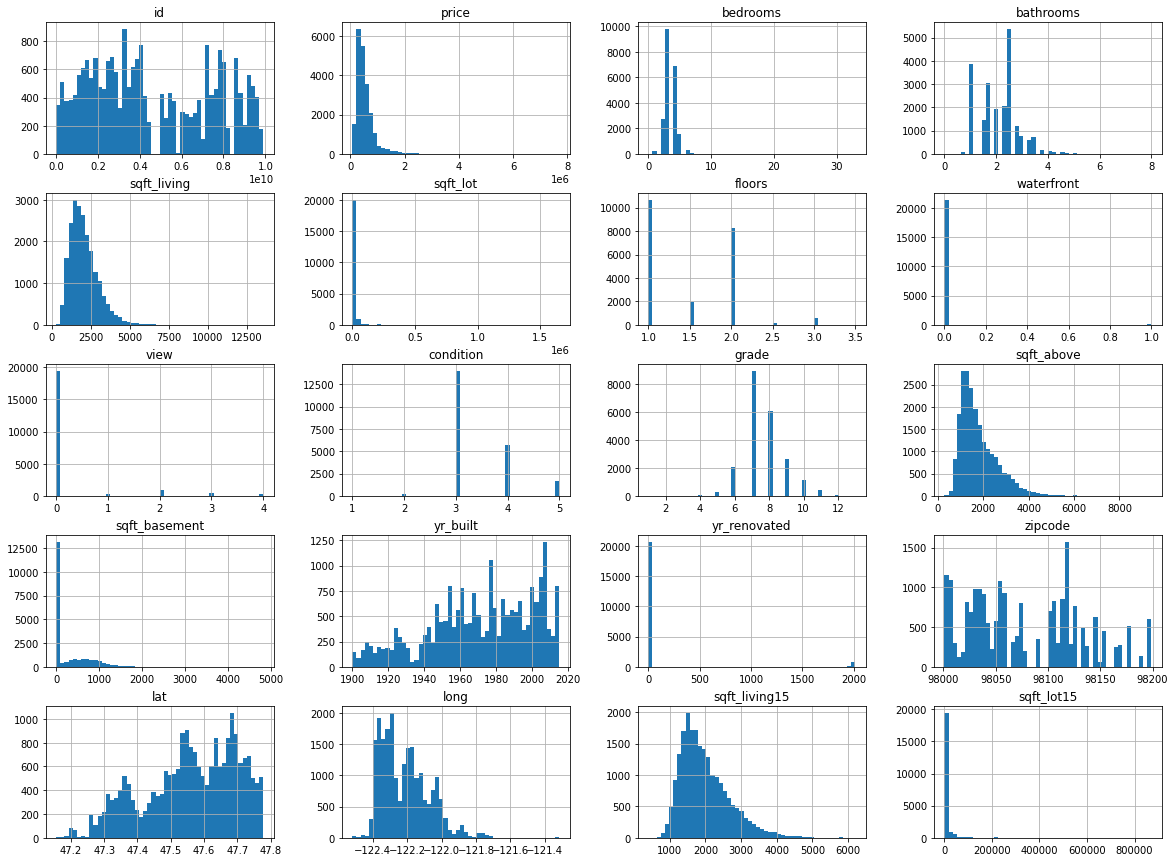

In [ ]:
#Histograms of all attributes to get an overview of the distributions
def all_histograms(data):
  data.hist(bins=50, figsize=(20,15))
  plt.show()

all_histograms(all_data)

Correlations to price:
price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64
Correlation Matrix:


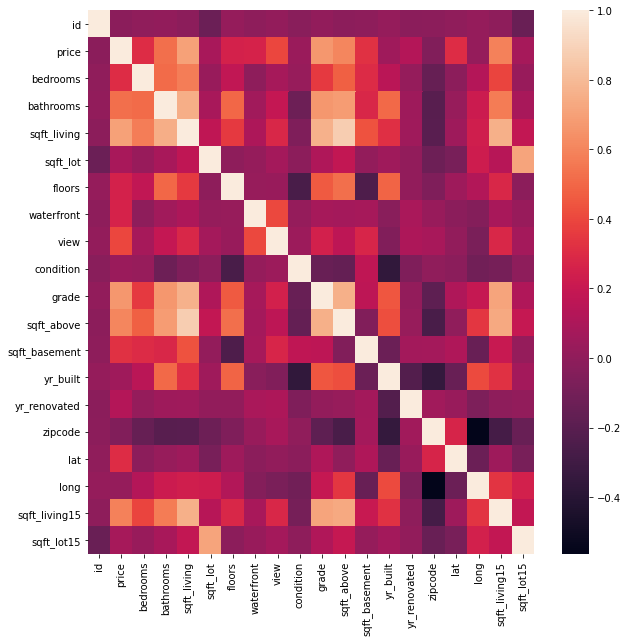

In [ ]:
#Corrleations:
#Correlations of attributes to house price
print("Correlations to price:")
corr_matrix = all_data.corr()
print(corr_matrix["price"].sort_values(ascending=False))

#Correlation matrix with all attributes
print("Correlation Matrix:")
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(corr_matrix, ax=ax)
plt.show()

#Conclusion: sqft_living is the attribute with the highest correlation to price
#Many attributes have a very small correlation to price
#Surprisingly, yr_built has a very small correlation to price

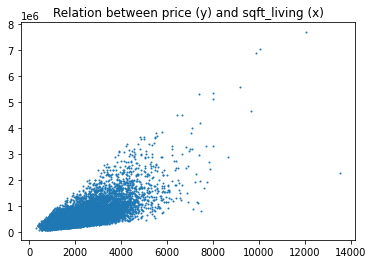

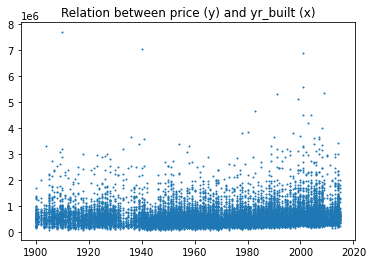

In [ ]:
#Function for plotting the relationship (correlation) between price and another parameter in a scatterplot
def relation_to_price(data, feature_name):
  price = data['price']
  feature = data[feature_name]

  plt.scatter(feature, price, s=1)
  plt.title(f'Relation between price (y) and {feature_name} (x)')
  plt.show()

#Plot attribute with highest and attribute with smallest correlation to price
relation_to_price(all_data, 'sqft_living')#high correlation
relation_to_price(all_data, 'yr_built')#small correlation

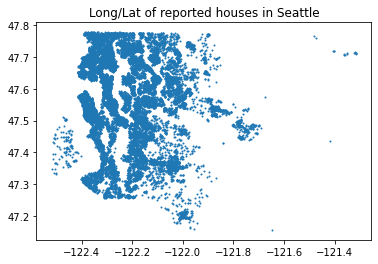

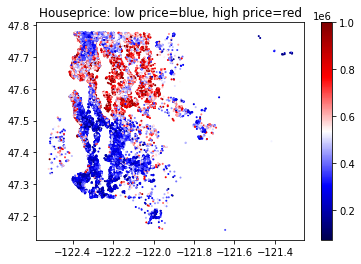

In [ ]:
#Function for plotting the geographic location of represented Seattle houses
def geographical_overview(data):
  
  #Plotting the geographic location
  plt.scatter(data['long'], data['lat'], s=1 )
  plt.title("Long/Lat of reported houses in Seattle")
  plt.show()

  #Plotting the geographic location with colour-gradient for the houseprice (just houses with price < 1 mio $)
  houses_under_one_mio = data[data['price']<=1000000]
  plt.scatter(houses_under_one_mio['long'], houses_under_one_mio['lat'],c=houses_under_one_mio['price'], s=1, cmap='seismic' )
  plt.title("Houseprice: low price=blue, high price=red")
  plt.colorbar()
  plt.show()

geographical_overview(all_data)

#Conclusion: The geographical structure of Seattle is fully represented by the house data
#In the seccond plot, we can see that house prices tend to be higher in the north of Seattle (because of the red colour). In fact, latitude has a correlation of 0.31 to price. 

# Train - Test Split

In this step, we seperate the house data into a train and test sample with a relation of 80/20.

In [7]:
#First: Delete data with house price > 2Mio$ (just 198 houses)
#Eliminate these outliers, because they have a big impact on the model performance
all_data_reduced = all_data[all_data['price']<=2000000]

#Genarating a Train-Test Split with 20% Test data
#With the random state of 42, we always get the exact same test /train data
train_data, test_data = train_test_split(all_data_reduced, test_size=0.2, random_state=42)

In [9]:
#Using the general_overview function to check the correctness of the split
print("Train data: ")
general_overview(train_data)
print("\nTest data:")
general_overview(test_data)

#Conclusion: The train-test split is working correctly, mean house prices differ only a little

Train data: 
General Data Overview:
Number of Colums:  21
Number of Rows:  17132
Mean house price:  519637



Test data:
General Data Overview:
Number of Colums:  21
Number of Rows:  4283
Mean house price:  518556




# Prepare Data

In this step, we prepare the data for the machine learning usage. In fact, we seperate house data from its labels, drop some unrelevant columns and scale the data with StandardScaler

In [10]:
# Prepare the data
# We do not have missing data for features in the data set (since all lines are non-null)
# We do not have to convert 'objects' out of the data set
# As we have no categorial attributes (just numeric ones) we do not have to convert other attributes.

#drop date, zipcode and id because we do not need it for our use case, drop price as it is the label
train_data_prepared = train_data.drop(['price', 'date', 'zipcode', 'id'], axis=1)
train_data_prepared.info()

#Seperate labels (price) from data
train_labels = train_data["price"].copy()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17132 entries, 14852 to 15933
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       17132 non-null  int64  
 1   bathrooms      17132 non-null  float64
 2   sqft_living    17132 non-null  int64  
 3   sqft_lot       17132 non-null  int64  
 4   floors         17132 non-null  float64
 5   waterfront     17132 non-null  int64  
 6   view           17132 non-null  int64  
 7   condition      17132 non-null  int64  
 8   grade          17132 non-null  int64  
 9   sqft_above     17132 non-null  int64  
 10  sqft_basement  17132 non-null  int64  
 11  yr_built       17132 non-null  int64  
 12  yr_renovated   17132 non-null  int64  
 13  lat            17132 non-null  float64
 14  long           17132 non-null  float64
 15  sqft_living15  17132 non-null  int64  
 16  sqft_lot15     17132 non-null  int64  
dtypes: float64(4), int64(13)
memory usage: 2.4 MB


In [11]:
#Pipeline for scaling the data with StandardScaler from scikit-learn
#Most machine learning algorithms can handle scaled data better
#StandardScaler : Ensures all features are at the same scale of mean = 0, standard deviation = 1
scale_pipeline = Pipeline([
('std_scaler', StandardScaler()),
])

#scaled_train_data is our new prepared train_data dataframe without labels
scaled_train_data = pd.DataFrame(scale_pipeline.fit_transform(train_data_prepared), columns=train_data_prepared.columns, index=train_data_prepared.index)
scaled_train_data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
14852,-1.454330,-1.467657,-0.325742,0.047163,-0.908329,-0.075067,3.808356,-0.628518,0.327341,-0.688688,0.612635,-0.477684,-0.20899,-1.622348,-0.993339,1.218190,0.304542
5728,-0.385405,-0.464816,-0.383637,-0.268534,-0.908329,-0.075067,-0.296206,0.916355,-0.547680,-1.016763,1.099107,-1.601450,-0.20899,0.109535,-0.520014,-0.463309,-0.326502
15417,-0.385405,-0.799096,-0.997317,0.147844,0.014763,-0.075067,3.808356,-0.628518,-0.547680,-0.726543,-0.661459,-0.784165,-0.20899,-0.819522,-1.028661,0.265836,0.140672
17283,-1.454330,-1.467657,-0.974159,-0.178518,-0.908329,-0.075067,-0.296206,-0.628518,-1.422701,-1.092473,0.056667,-0.716058,-0.20899,0.703901,-1.290049,-0.954367,-0.234980
123,0.683521,-0.464816,0.056360,-0.260504,0.014763,-0.075067,-0.296206,2.461228,-0.547680,-0.057775,0.218824,-1.601450,-0.20899,-0.213615,-0.371659,-0.180579,-0.314206


# Linear Regression

As a first basic model, we use the linear regression to test how the data behaves on a linear model.

In [12]:
#Linear Regression as a first ML-Model 
#We use scikit-learn as the libary for our Machine Learning part
lin_reg = LinearRegression()
lin_reg.fit(scaled_train_data, train_labels)

linear_predictions = lin_reg.predict(scaled_train_data)

# Calculate the root mean square error (rsme) for the predictions
lin_mse = mean_squared_error(train_labels, linear_predictions)
lin_rmse = np.sqrt(lin_mse)
print("RMSE Linear Regression: ", lin_rmse)

#Conclusion: The RMSE is hery huge, so the linear regression model underfits the data. We need a more complex model. 

RMSE Linear Regression:  155135.75425577667


In [13]:
#Cross-validation of the linear regression for a better evaluation
#We use the cross_val_score function of scikit learn
scores = cross_val_score(lin_reg, scaled_train_data, train_labels,
scoring="neg_mean_squared_error", cv=5) #5 Folds
lin_rmse_scores = np.sqrt(-scores)

#Function for displaying the scores of the cross-validation, including their mean and std. deviation
def crossval_scores(scores):
  print("Cross Validation: ")
  print("RMSE Scores:", np.round((scores),2))
  print("Scores Mean:", scores.mean())
  print("Standard deviation:", scores.std())

crossval_scores(lin_rmse_scores)

Cross Validation: 
RMSE Scores: [151041.   152261.63 157247.39 153911.13 162573.87]
Scores Mean: 155407.0049945239
Standard deviation: 4145.9384030179335


# Random Forest Regression

Random Forest Regression as a Bagging Ensemble Model can fit to our use case much better than a simple Decision Tree or Linear Regression. Random Forest combines the results of many different Decision Trees.

In [14]:
#Random Forest Regression (Ensemble method)
#Random Forest combines many decision trees by Bagging
forest_reg = RandomForestRegressor()
forest_reg.fit(scaled_train_data, train_labels)

forest_predictions = forest_reg.predict(scaled_train_data)

#Calculate the root mean square error (rsme) for the predictions
forest_mse = mean_squared_error(train_labels, forest_predictions)
forest_rmse = np.sqrt(forest_mse)
print("RMSE Random Forest Regression: ", forest_rmse)

#Conclusion: The Random forest regressor performs much better than the linear regressor

RMSE Random Forest Regression:  38946.36521303454


In [15]:
#Cross-validation of the Random forest Regression for a better evaluation
scores = cross_val_score(forest_reg, scaled_train_data, train_labels,
scoring="neg_mean_squared_error", cv=5) #5 Folds
forest_rmse_scores = np.sqrt(-scores)

crossval_scores(forest_rmse_scores)

#Conclusion: The cross-validation RMSE is really bigger than train-data RMSE, so the model overfits the data

Cross Validation: 
RMSE Scores: [101305.96  99048.96 104268.75 105619.5  107482.64]
Scores Mean: 103545.16432977127
Standard deviation: 3018.6083241727424


# Gradient Boosting Regression

As a third model, we train a Gradient Boosting Regressor, which is also an ensemble method, which works with Boosting instead of Bagging.

In [16]:
#Gradient Boosting Regression (Ensemble method)
gradient_reg = GradientBoostingRegressor()
gradient_reg.fit(scaled_train_data, train_labels)

gradient_predictions = gradient_reg.predict(scaled_train_data)

#Calculate the root mean square error (rmse) for the predictions
gradient_mse = mean_squared_error(train_labels, gradient_predictions)
gradient_rmse = np.sqrt(gradient_mse)
print("RMSE Gradient Boosting Regression: ", gradient_rmse)

RMSE Gradient Boosting Regression:  101559.98988098091


In [17]:
#Cross-validation of the Gradient Boosting Regression for a better evaluation
scores = cross_val_score(gradient_reg, scaled_train_data, train_labels,
scoring="neg_mean_squared_error", cv=5) #5 Folds
gradient_rmse_scores = np.sqrt(-scores)

crossval_scores(gradient_rmse_scores)

#Conclusion: The cross-validation RMSE does not differ a lot from train-data RMSE
#Gradient Boosting Model performs a little bit worse than Random Forest, but overfits the data less

Cross Validation: 
RMSE Scores: [106804.14 104424.16 111476.99 108625.73 115068.86]
Scores Mean: 109279.97714438813
Standard deviation: 3700.669625300131


# Evaluation with test data

After training some models, we now test their performances on the test data. We herefore calculate the RMSEs and the R2-Values.

In [18]:
#Model evaluation with test data
#Transform test data (drop columns and scale data)
test_data_prepared = test_data.drop(['price', 'date', 'zipcode', 'id'], axis=1) 
scaled_test_data = pd.DataFrame(scale_pipeline.transform(test_data_prepared), columns=test_data_prepared.columns, index=test_data_prepared.index)

test_labels = test_data["price"].copy()

#Function for calculating the RMSE on test data
def test_rmse(model):
  test_predictions = model.predict(scaled_test_data)
  test_mse = mean_squared_error(test_labels, test_predictions)
  test_rmse = np.sqrt(test_mse) 
  return test_rmse

#Print the rms-errors of the models on test data
print("Linear Regression RMSE: ", test_rmse(lin_reg))
print("Random Forest RMSE: ", test_rmse(forest_reg))
print("Gradient Boosting RMSE: ", test_rmse(gradient_reg))

Linear Regression RMSE:  153931.43026255982
Random Forest RMSE:  104542.8065324366
Gradient Boosting RMSE:  109162.8015752237


Linear Regression R2-Score:  0.703
Random Forest R2-Score:  0.863
Gradient Boosting R2-Score:  0.85


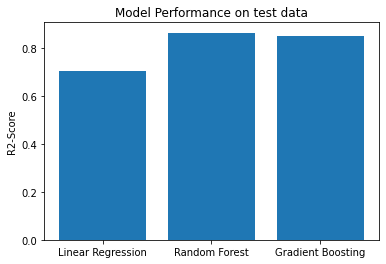

In [19]:
#R2-Value as Evaluation measure
#worst r2-score = 0, best r2-score = 1
#Function for calculating the r2 scores on test data
def test_r2_score(model):
  test_predictions = model.predict(scaled_test_data)
  r2 = np.round((r2_score(test_labels, test_predictions)),3)
  return r2

#Print the R2-Scores of the models on test data
print("Linear Regression R2-Score: ", test_r2_score(lin_reg))
print("Random Forest R2-Score: ", test_r2_score(forest_reg))
print("Gradient Boosting R2-Score: ", test_r2_score(gradient_reg))

#Visualization of model performances (R2-Scores on test data):
model_names = ['Linear Regression','Random Forest','Gradient Boosting']
model_r2_scores = [test_r2_score(lin_reg), test_r2_score(forest_reg), test_r2_score(gradient_reg)]
plt.bar(model_names, model_r2_scores)
plt.title("Model Performance on test data")
plt.ylabel("R2-Score")
plt.show()

In [20]:
#Example Prediction of house prices with the Random Forest Regressor
#Predict prices for 3 example houses
example_data = scaled_test_data.iloc[:3]
example_labels = test_labels.iloc[:3]

print("Predictions:", forest_reg.predict(example_data))
print("Real Prices:", list(example_labels))

Predictions: [243634.18 398048.95 521779.5 ]
Real Prices: [234950.0, 400000.0, 430000.0]


# Hyperparameter Optimization

We try to optimize the performance of the Random Forest Regressor, as it is our model with the best RMSE and R2-Score. 

In [21]:
#List the parameters which are currently used in the Random Forest Regressor
print('Random Forest Parameters currently in use:\n')
pprint(forest_reg.get_params())

Random Forest Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [22]:
#GridSearchCV: Try different combinations of hyperparameters
#Try different n_estimators (=number of trees in forest) and also try bootstrap=false (bootstrap = method for sampling data points)
param_grid = [         
{'n_estimators': [75, 100, 125]},
{'bootstrap': [False], 'n_estimators': [75, 100, 125]},
]

forest_reg_optimized = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg_optimized, param_grid, cv=5,
scoring='neg_mean_squared_error',
return_train_score=True)

grid_search.fit(scaled_train_data, train_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [24]:
#Print the best parameter combination of the grid search
print("Best parameters: ", grid_search.best_params_)

#Evaluate with train data
grid_search_predictions = grid_search.predict(scaled_train_data)
grid_search_forest_mse = mean_squared_error(train_labels, grid_search_predictions)
grid_search_forest_rmse = np.sqrt(grid_search_forest_mse)
print("Grid Search Random Forest RMSE on train data: ", grid_search_forest_rmse)

#Evaluate with test data
print("Grid Search Random Forest RMSE on test data: ",test_rmse(grid_search))
print("Grid Search Random Forest R2-Score: ", test_r2_score(grid_search))
#Conclusion: Using 100 estimators and bootstrap is still the best option. 

Best parameters:  {'n_estimators': 100}
Grid Search Random Forest RMSE on train data:  39205.00770011049
Grid Search Random Forest RMSE on test data:  104346.96127995006
Grid Search Random Forest R2-Score:  0.863


In [ ]:
#General Conclusion:
#The Random Forest Regressor has the best performances on train and test data, but overfits the data. 
#By tuning the hyperparamters with GridSearchCV, we were not really able to achieve a performance improvement.
#With our trained Random Forest Regressor, House Prices in Seattle can be predicted with a R2-Score of 0.86.